#Imports and settings

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Nov  4 12:30:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split
import os
import sys
import shutil
import matplotlib.pyplot as plt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Preparing the dataset

---



#Copy dataset into workspace

In [ ]:
shutil.copytree("/content/drive/MyDrive/Thesis_partB/annotations/A","/content/A/") # copy dataset into workspace
shutil.copytree("/content/drive/MyDrive/Thesis_partB/annotations/B","/content/B/") # copy dataset into workspace


'/content/B/'

#This function `organize_data` - organize the data into two folders - images and labels.

In [ ]:
def organize_data(source):

  # Specify the source folder containing images and text files
  source_folder = source #'/content/dataset/'

  # Specify the destination folder for images and text files
  destination_folder_images =  source_folder+'/images'
  destination_folder_labels = source_folder+'/labels'

  # Create the destination folders if they don't exist
  os.makedirs(destination_folder_images, exist_ok=True)
  os.makedirs(destination_folder_labels, exist_ok=True)

  # Iterate through the files in the source folder
  for filename in os.listdir(source_folder):
      source_file = os.path.join(source_folder, filename)

      # Check if the file is an image
      if filename.lower().endswith(('.jpeg')):
          destination_file = os.path.join(destination_folder_images, filename)
          shutil.move(source_file, destination_file)
          print(f"Moved image: {filename} to {destination_folder_images}")

      # Check if the file is a text file
      elif filename.lower().endswith('.txt'):
          destination_file = os.path.join(destination_folder_labels, filename)
          shutil.move(source_file, destination_file)
          print(f"Moved text file: {filename} to {destination_folder_labels}")

      else:
          print(f"Skipping file: {filename}")

  print("Finished moving files.")

organize_data('/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test')
organize_data('/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/train')
organize_data('/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/val')



Moved image: 0013897.jpeg to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/images
Moved image: 0011989.jpeg to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/images
Moved image: 0012189.jpeg to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/images
Moved text file: 0013621.txt to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/labels
Moved image: 0011927.jpeg to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/images
Moved text file: 0015989.txt to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/labels
Moved text file: 0011857.txt to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/labels
Moved text file: 0013827.txt to /content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test/labels
Moved image:

#`data_labels_count` function visualize the data sepration into two classes.





Class 0: 7091 instances
Class 1: 3723 instances


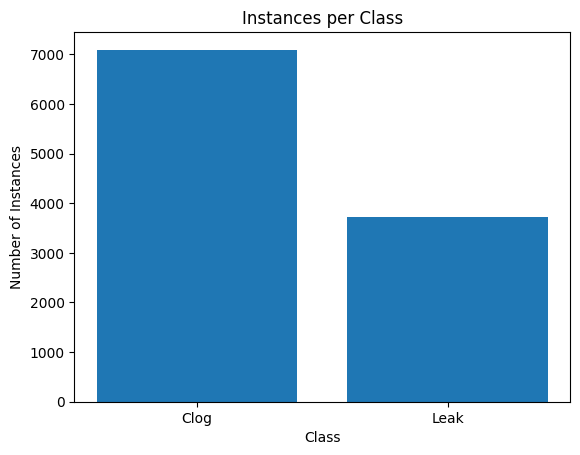

Class 0: 1345 instances
Class 1: 729 instances


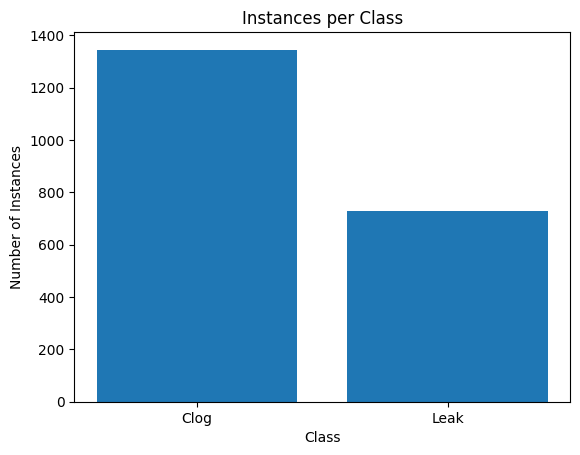

Class 0: 741 instances
Class 1: 663 instances


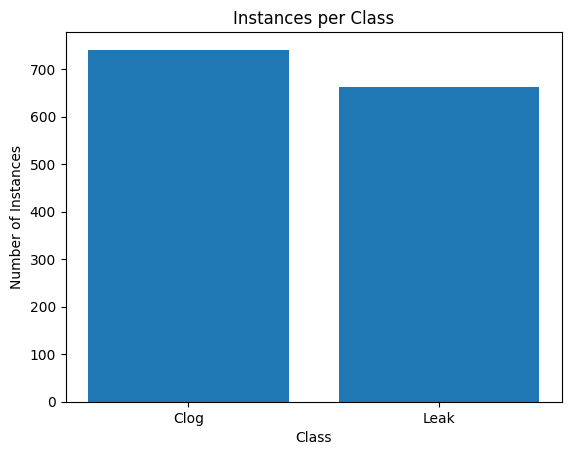

In [ ]:

def data_labels_count(annotationFolder):
  # Path to the folder containing annotation files (YOLO format)
  annotation_folder = annotationFolder#'/content/dataset/train/labels/'

  # Create a dictionary to store class counts
  class_counts = {}

  # Iterate through annotation files
  for filename in os.listdir(annotation_folder):
      if filename.lower().endswith('.txt'):
          with open(os.path.join(annotation_folder, filename), 'r') as file:
              lines = file.readlines()
              for line in lines:
                  class_id = int(line.split()[0])
                  if class_id in class_counts:
                      class_counts[class_id] += 1
                  else:
                      class_counts[class_id] = 1

  # Print the class counts
  for class_id, count in class_counts.items():
      print(f"Class {class_id}: {count} instances")
  # Create a bar plot
  class_labels = ['Clog', 'Leak']
  instance_counts = [class_counts.get(0, 0), class_counts.get(1, 0)]

  plt.bar(class_labels, instance_counts)
  plt.xlabel('Class')
  plt.ylabel('Number of Instances')
  plt.title('Instances per Class')
  plt.show()

#data_labels_count('/content/A/labels')

data_labels_count('/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A/Geospatial/train/labels')
data_labels_count('/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A/Geospatial/val/labels')
data_labels_count('/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A/Geospatial/test/labels')


#Just if needed - clear txt file if empty / replace labels

In [ ]:
def clear_empty(dir_source, dir_des):
  dir_path = dir_source
  list_files = os.listdir(dir_path)
  sorted_files = sorted(list_files, key=lambda x: int(x.split('.')[0]))
  des_path = dir_des
  os.makedirs(des_path, exist_ok=True)

  for file in sorted_files:
      file_path = dir_path +file
      if(os.path.isfile(file_path)):
        if file.endswith('txt'):
          if os.stat(file_path).st_size > 0:
            jpeg_name = file.replace('txt', 'jpeg')
            jpeg_path = dir_path + jpeg_name
            os.system(f'cp "{file_path}" {des_path}\\{file}')
            os.system(f'cp "{jpeg_path}" {des_path}\\{jpeg_name}')
clear_empty("/content/drive/MyDrive/Thesis_partB/annotations/B/", "/content/drive/MyDrive/Thesis_partB/annotations/B_organize/")

In [ ]:
def replace_labels(dir_path):
  for file_name in os.listdir(dir_path):
    file_path = f'{dir_path}/{file_name}'
    if os.path.isfile(file_path):
      with open(file_path, 'r') as fr:
        lines = fr.readlines()
      if lines:
        new_lines = []
        for line in lines:
          line_arr = line.split()
          if  line_arr[0] == '0':
            print(file_path)
            os.remove(file_path)
          else:
            line_arr[0] = '0'
            new_line = "\t".join(line_arr)
            new_lines.append(new_line)
        with open(file_path, 'w') as fw:
          fw.write("\n".join(new_lines))
replace_labels("/content/dataset/test/labels")

/content/dataset/test/labels/0013593.txt
/content/dataset/test/labels/0013597.txt
/content/dataset/test/labels/0013587.txt
/content/dataset/test/labels/0013599.txt
/content/dataset/test/labels/0013589.txt
/content/dataset/test/labels/0013601.txt
/content/dataset/test/labels/0013595.txt
/content/dataset/test/labels/0013603.txt


#Create datatset of Clog only

In [ ]:
# you need to organize the data before execution

import os
import shutil
#shutil.copytree("/content/drive/MyDrive/Thesis_partB/annotations/A","/content/datasets/train")
#organize_data("/content/datasets/train")
#organize_data("/content/splits/test")

source_image_folder = "/content/splits/val/images"
source_txt_folder = "/content/splits/val/labels"
destination_folder_images = "/content/datasets/val/images/"
destination_folder_text = "/content/datasets/val/labels/"
#os.makedirs(destination_folder_images)
#os.makedirs(destination_folder_text)

# List image files
image_files = [f for f in os.listdir(source_image_folder) if f.lower().endswith(".jpeg")]

# Iterate through image files
for image_file in image_files:
    image_name = os.path.splitext(image_file)[0]
    txt_file_path = os.path.join(source_txt_folder, f"{image_name}.txt")
 # Check if corresponding txt file exists
    if os.path.exists(txt_file_path):
        all_instances_are_class_0 = True
        with open(txt_file_path, 'r') as txt_file:
            lines = txt_file.readlines()
            for line in lines:
                parts = line.strip().split()
                if int(parts[0]) != 0:  # Check if class ID is not 0
                    all_instances_are_class_0 = False

                    break  # Exit the loop, as we found a non-class-0 instance

        if all_instances_are_class_0:
            # Copy image and txt file to destination folder
            shutil.copy(os.path.join(source_image_folder, image_file), destination_folder_images)
            shutil.copy(txt_file_path, destination_folder_text)

print("Done filtering and copying.")


Done filtering and copying.


Class 0: 4721 instances


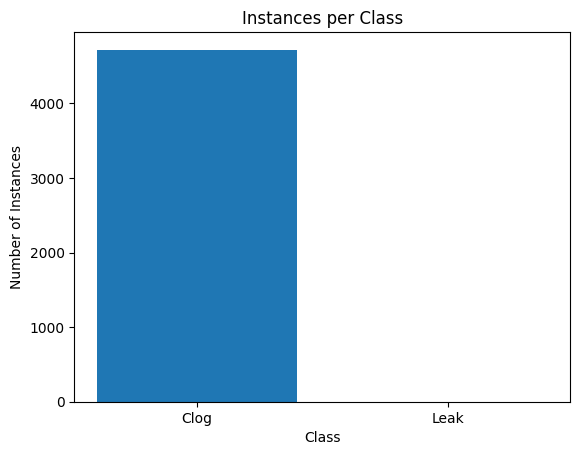

297
Class 0: 1143 instances


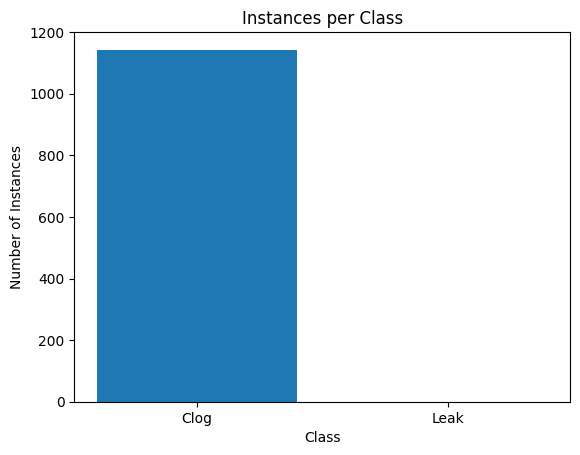

127
Class 0: 1817 instances


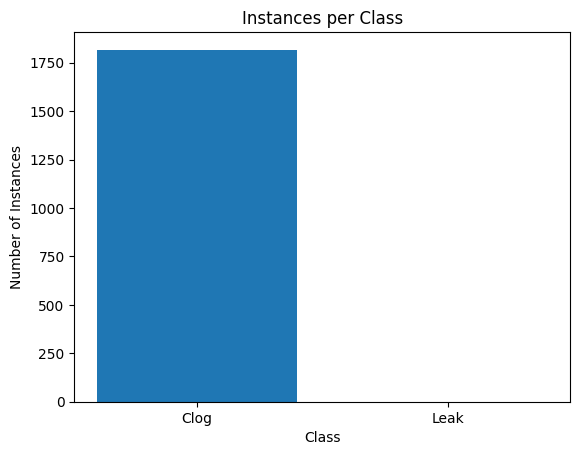

344


In [ ]:
#organize_data("/content/content/dataset-clog")
data_labels_count("/content/datasets/train/labels")
print(len(os.listdir("/content/datasets/train/labels")))
data_labels_count("/content/datasets/val/labels")
print(len(os.listdir("/content/datasets/val/labels")))
data_labels_count("/content/datasets/test/labels")
print(len(os.listdir("/content/datasets/test/labels")))

In [ ]:
shutil.copytree("/content/drive/MyDrive/Thesis_partB/annotations/B_organize/","/content/dataset/test")


'/content/dataset/test'

# Diffrent method for sampling the data

In [ ]:
def split(training_path):
  # Path to the folder containing your training images and labels
  training_folder = training_path #'/content/dataset/train/images'

  train_folder = '/content/datasets/train'
  val_folder = '/content/datasets/val'

  # Create train and validation folders if they don't exist
  os.makedirs(os.path.join(train_folder, 'images'), exist_ok=True)
  os.makedirs(os.path.join(train_folder, 'labels'), exist_ok=True)
  os.makedirs(os.path.join(val_folder, 'images'), exist_ok=True)
  os.makedirs(os.path.join(val_folder, 'labels'), exist_ok=True)

  # List all image files in the training folder
  image_files = [file for file in os.listdir(training_folder) if file.lower().endswith(('.jpeg'))]
  print(image_files)
  # Sort the image files to ensure consistent order
  image_files.sort()

  # Splitting logic: 10 images for train, 3 images for validation
  train_count = 10
  val_count = 3

  for i, image_file in enumerate(image_files):
      source_image = os.path.join(training_folder, image_file)
      label_file = os.path.splitext(image_file)[0] + '.txt'  # Assuming labels have the same name with .txt extension
      source_label = '/content/dataset/train/labels/' +label_file

      if i % (train_count + val_count) < train_count:
          destination_folder = os.path.join(train_folder, 'images')
          destination_label_folder = os.path.join(train_folder, 'labels')
      else:
          destination_folder = os.path.join(val_folder, 'images')
          destination_label_folder = os.path.join(val_folder, 'labels')

      destination_image = os.path.join(destination_folder, image_file)
      destination_label = os.path.join(destination_label_folder, label_file)

      shutil.copyfile(source_image, destination_image)
      print("source_label",source_label)
      print("destination_label",destination_label)
      shutil.copyfile(source_label, destination_label)

  print("Splitting complete.")



#split('/content/dataset/train/images')

In [ ]:
def time_based_split(dataset_path, train_percent, val_percent, test_percent):
    # Path to the folder containing your images
    image_folder = dataset_path

    # Path to the folders where you want to create the train, validation, and test sets
    train_folder = '/content/datasets/train'
    val_folder = '/content/datasets/val'
    test_folder = '/content/datasets/test'

    # Create train, validation, and test folders if they don't exist
    os.makedirs(os.path.join(train_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(train_folder, 'labels'), exist_ok=True)
    os.makedirs(os.path.join(val_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(val_folder, 'labels'), exist_ok=True)
    os.makedirs(os.path.join(test_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(test_folder, 'labels'), exist_ok=True)

    # List all image files in the image folder
    image_files = [file for file in os.listdir(image_folder) if file.lower().endswith(('.jpeg'))]
    print(image_files)
    # Sort the image files by name (assuming the names contain timestamps)
    image_files.sort()

    # Calculate the number of images for each set
    total_images = len(image_files)
    num_train = int(total_images * train_percent)
    num_val = int(total_images * val_percent)
    num_test = total_images - num_train - num_val

    # Move images to the appropriate sets
    for i, image_file in enumerate(image_files):
        source_image = os.path.join(image_folder, image_file)
        label_file = os.path.splitext(image_file)[0] + '.txt'  # Assuming labels have the same name with .txt extension
        source_label = os.path.join('/content/A/labels', label_file)

        if i < num_train:
            destination_folder = os.path.join(train_folder, 'images')
            destination_label_folder = os.path.join(train_folder, 'labels')
        elif i < num_train + num_val:
            destination_folder = os.path.join(val_folder, 'images')
            destination_label_folder = os.path.join(val_folder, 'labels')
        else:
            destination_folder = os.path.join(test_folder, 'images')
            destination_label_folder = os.path.join(test_folder, 'labels')

        destination_image = os.path.join(destination_folder, image_file)
        destination_label = os.path.join(destination_label_folder, label_file)

        shutil.copyfile(source_image, destination_image)
        print("source_label", source_label)
        print("destination_label", destination_label)
        shutil.copyfile(source_label, destination_label)

    print("Splitting complete.")

# Call the time_based_split function with your dataset path and percentage values
#time_based_split('/content/A/images', train_percent=0.7, val_percent=0.3, test_percent=0)

In [ ]:
## random split
img_dir = "/content/A/images"
labels_dir = "/content/A/labels"
if not os.path.exists("/content/datasets/"):
    os.makedirs("/content/datasets/")

img_list = os.listdir(img_dir)
train_list, test = train_test_split(img_list, test_size=0.3, random_state=42)#30%for test and 70 for training
val_list, test_list = train_test_split(test, test_size=0.5, random_state=42)#split equaly to validation and test

train_img_path = "/content/datasets/train/images/"
train_ann_path = "/content/datasets/train/labels/"
val_img_path = "/content/datasets/val/images/"
val_ann_path = "/content/datasets/val/labels/"
test_img_path = "/content/datasets/test/images/"
test_ann_path = "/content/datasets/test/labels/"

if not os.path.exists(train_img_path):
    os.makedirs(train_img_path)
if not os.path.exists(train_ann_path):
    os.makedirs(train_ann_path)
if not os.path.exists(val_img_path):
    os.makedirs(val_img_path)
if not os.path.exists(val_ann_path):
    os.makedirs(val_ann_path)
if not os.path.exists(test_img_path):
    os.makedirs(test_img_path)
if not os.path.exists(test_ann_path):
    os.makedirs(test_ann_path)

def copy_images(image_list, img_dir, ann_dir, out_img_path, out_ann_path):
    for img in image_list:
        ann = img.split(".")[0] + ".txt"
        shutil.copy(os.path.join(img_dir, img), os.path.join(out_img_path, img))
        if os.path.isfile(f"{labels_dir}/{ann}"):
          shutil.copy(os.path.join(labels_dir, ann), os.path.join(out_ann_path, ann))
    img_count = len(os.listdir(out_img_path))

    return img_count

# Copy training images
train_img_count = copy_images(train_list, img_dir, labels_dir, train_img_path, train_ann_path)
print(train_img_count)
# Copy validation images
val_img_count = copy_images(val_list, img_dir, labels_dir, val_img_path, val_ann_path)
print(val_img_count)
# Copy testing images
test_img_count = copy_images(test_list, img_dir, labels_dir, test_img_path, test_ann_path)
print(test_img_count)


632
136
136


In [ ]:
# random without test
img_dir = "/content/A/images"
labels_dir = "/content/A/labels"
if not os.path.exists("/content/data/"):
    os.makedirs("/content/data/")

img_list = os.listdir(img_dir)
train_list, val_list = train_test_split(img_list, test_size=0.3, random_state=42)#30%for test and 70 for training
#val_list, test_list = train_test_split(test, test_size=0.5, random_state=42)#split equaly to validation and test

train_img_path = "/content/data/train/images/"
train_ann_path = "/content/data/train/labels/"
val_img_path = "/content/data/val/images/"
val_ann_path = "/content/data/val/labels/"
#test_img_path = "/content/datasets/test/images/"
#test_ann_path = "/content/datasets/test/labels/"

if not os.path.exists(train_img_path):
    os.makedirs(train_img_path)
if not os.path.exists(train_ann_path):
    os.makedirs(train_ann_path)
if not os.path.exists(val_img_path):
    os.makedirs(val_img_path)
if not os.path.exists(val_ann_path):
    os.makedirs(val_ann_path)
#if not os.path.exists(test_img_path):
#    os.makedirs(test_img_path)
#if not os.path.exists(test_ann_path):
#    os.makedirs(test_ann_path)

def copy_images(image_list, img_dir, ann_dir, out_img_path, out_ann_path):
    for img in image_list:
        ann = img.split(".")[0] + ".txt"
        shutil.copy(os.path.join(img_dir, img), os.path.join(out_img_path, img))
        if os.path.isfile(f"{labels_dir}/{ann}"):
          shutil.copy(os.path.join(labels_dir, ann), os.path.join(out_ann_path, ann))
    img_count = len(os.listdir(out_img_path))

    return img_count

# Copy training images
train_img_count = copy_images(train_list, img_dir, labels_dir, train_img_path, train_ann_path)
print(train_img_count)
# Copy validation images
val_img_count = copy_images(val_list, img_dir, labels_dir, val_img_path, val_ann_path)
print(val_img_count)
# Copy testing images
#test_img_count = copy_images(test_list, img_dir, labels_dir, test_img_path, test_ann_path)
#print(test_img_count)


632
272


In [ ]:
#new Algo!  combanation of time based and location
import pandas as pd
import os
from math import ceil
import shutil

# Load Excel file
excel_file_path = '/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/docs/A.xlsx'
data = pd.read_excel(excel_file_path)

# Group files based on the assigned numbers
grouped = data.groupby('GroupNumber')['File name'].apply(list)

# Function to split data into train, val, and test sets
def split_data(data, train_ratio, val_ratio, test_ratio, even_group=False):
    total_files = len(data)
    if even_group:
        test_count = ceil(total_files * test_ratio)
        val_count = ceil(total_files * val_ratio)
        train_count = total_files - test_count - val_count
        assignments = ['test'] * test_count + ['val'] * val_count + ['train'] * train_count
    else:
        train_count = ceil(total_files * train_ratio)
        val_count = ceil(total_files * val_ratio)
        test_count = total_files - train_count - val_count
        assignments = ['train'] * train_count + ['val'] * val_count + ['test'] * test_count
    return assignments

# Add an 'Assignment' column to the DataFrame
data['Assignment'] = None

output_dir = '/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo'  # Adjust this path

# Assign and move files based on the 'Assignment' column
for group_num, files in grouped.items():
    even_group = group_num % 2 == 0

    # Divide each group into subgroups
    subgroup_size = len(files) // 3
    subgroups = [files[i:i + subgroup_size] for i in range(0, len(files), subgroup_size)]

    for subgroup_idx, subgroup_data in enumerate(subgroups):
        # Divide subgroup into train, val, and test
        #assignments = split_data(subgroup_data, 0.7, 0.15, 0.15, even_group)
        assignments = split_data(subgroup_data, 0.7, 0.3, even_group)


        for file_info, assignment in zip(subgroup_data, assignments):
            file_name = os.path.basename(file_info)
            data.loc[data['File name'] == file_info, 'Assignment'] = assignment
            source_img_path = os.path.join('/content/A', file_name)
            source_txt_path = os.path.join('/content/A', file_name.replace('.jpeg', '.txt'))
            dest_img_path = os.path.join(output_dir, assignment, file_name)
            dest_txt_path = os.path.join(output_dir, assignment, file_name.replace('.jpeg', '.txt'))

            os.makedirs(os.path.dirname(dest_img_path), exist_ok=True)
            os.makedirs(os.path.dirname(dest_txt_path), exist_ok=True)
            if os.path.isfile(source_img_path):
              shutil.copy(source_img_path, dest_img_path)  # Move image
              shutil.copy(source_txt_path, dest_txt_path)  # Move txt

# Save the updated DataFrame to the Excel file
data.to_excel(excel_file_path, index=False)

print("Data split and saved successfully.")


Data split and saved successfully.


In [ ]:
shutil.copytree('/content/B' , '/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test',dirs_exist_ok = True)
#shutil.copytree('/content/drive/MyDrive/Thesis_partB/splits/val', '/content/dataset/val')
#shutil.copytree('/content/drive/MyDrive/Thesis_partB/splits/test', '/content/dataset/val',dirs_exist_ok = True)

'/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test'

In [ ]:
organize_data('/content/B_splits/val')
organize_data('/content/B_splits/train')
organize_data('/content/B_splits/test')

Moved text file: 0011887.txt to /content/B_splits/val/labels
Moved text file: 0012399.txt to /content/B_splits/val/labels
Moved text file: 0011723.txt to /content/B_splits/val/labels
Moved text file: 0012131.txt to /content/B_splits/val/labels
Moved text file: 0011615.txt to /content/B_splits/val/labels
Moved text file: 0012391.txt to /content/B_splits/val/labels
Moved image: 0011729.jpeg to /content/B_splits/val/images
Moved text file: 0012393.txt to /content/B_splits/val/labels
Moved image: 0012387.jpeg to /content/B_splits/val/images
Moved image: 0015977.jpeg to /content/B_splits/val/images
Moved text file: 0011625.txt to /content/B_splits/val/labels
Moved text file: 0012143.txt to /content/B_splits/val/labels
Moved image: 0012475.jpeg to /content/B_splits/val/images
Moved image: 0011887.jpeg to /content/B_splits/val/images
Moved image: 0013627.jpeg to /content/B_splits/val/images
Moved text file: 0012127.txt to /content/B_splits/val/labels
Moved image: 0012391.jpeg to /content/B_sp

Class 0: 444 instances


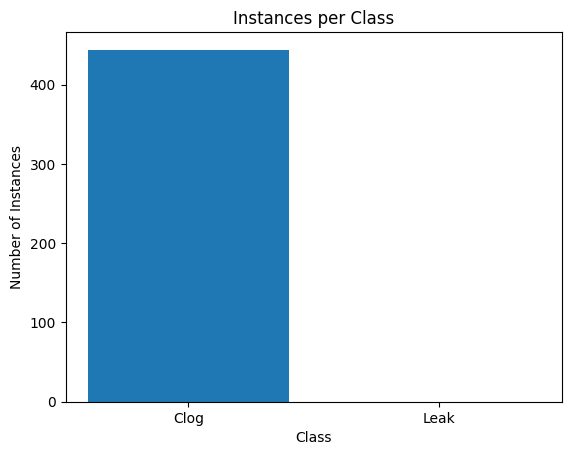

Class 0: 1095 instances


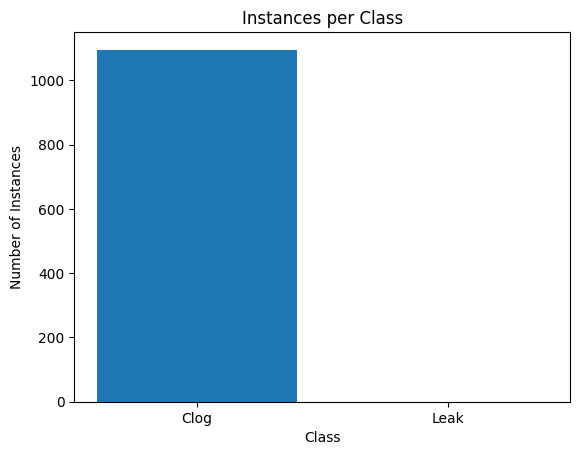

Class 0: 278 instances


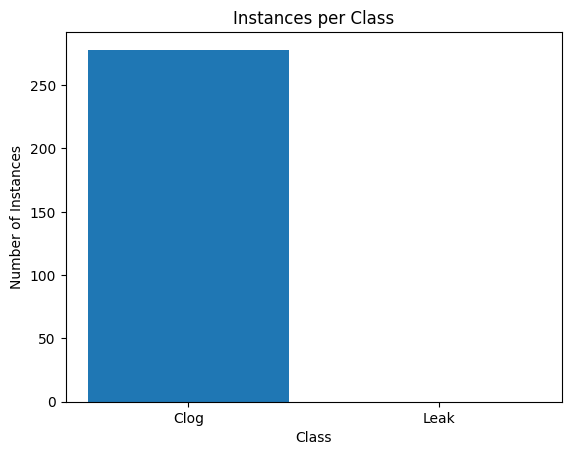

In [ ]:
#shutil.copytree("/content/B","/content/data/test")
data_labels_count('/content/B_splits/test/labels')
data_labels_count('/content/B_splits/train/labels')
data_labels_count('/content/B_splits/val/labels')


In [ ]:
shutil.copytree("/content/dataset/test","/content/datasets/test")

'/content/datasets/test'

In [ ]:
shutil.copytree("/content/drive/MyDrive/Thesis_partB/TrainA_TestB","/content/Results")

'/content/Results'

# **Format converter**

In [ ]:
!git clone https://github.com/Taeyoung96/Yolo-to-COCO-format-converter.git

Cloning into 'Yolo-to-COCO-format-converter'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 278 (delta 46), reused 47 (delta 35), pack-reused 208
Receiving objects: 100% (278/278), 30.92 MiB | 34.57 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
cd Yolo-to-COCO-format-converter

/content/Yolo-to-COCO-format-converter


In [ ]:
!python main.py --yolo-subdir --path '/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/test' --output test_coco.json
!python main.py --yolo-subdir --path '/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/train' --output train_coco.json
!python main.py --yolo-subdir --path '/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/val' --output val_coco.json

Start!
Processing 449 ...Finished!
Start!
Processing 660 ...Finished!
Start!
Processing 242 ...Finished!


In [ ]:
shutil.copy("/content/Yolo-to-COCO-format-converter/output/test_coco.json","/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo")
shutil.copy("/content/Yolo-to-COCO-format-converter/output/train_coco.json","/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo")
shutil.copy("/content/Yolo-to-COCO-format-converter/output/val_coco.json","/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo")

'/content/drive/MyDrive/Thesis_partB/Coolab_nootbook/annotations/A(Train+Val)/Geo/val_coco.json'

In [ ]:
!python main.py --path '/content/A' --output pilot_A.json

Start!
Processing 903 ...Finished!


# **Yolov8**

In [ ]:
%pip install ultralytics
%pip uninstall -y albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 6.8 MB/s eta 0:00:00
Found existing installation: albumentations 1.3.1
Uninstalling albumentations-1.3.1:
  Successfully uninstalled albumentations-1.3.1


In [ ]:
#!git clone https://github.com/ultralytics/ultralytics.git

In [ ]:
%pip install clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
!pip install clearml
!clearml-init
from ultralytics import YOLO
from clearml import Task


ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
api {      # Stav Rozenfeld's workspace     web_server: https://app.clear.ml     api_server: https://api.clear.ml     files_server: https://files.clear.ml     credentials {         "access_key" = "ZIHRRYECSVJFPL7EZ14L"         "secret_key"  = "rqcH9yatqlR6852VKjjbV2R9DueN8uBa29edE3JvZMfyvyfNOV"     } }
Detected credentials key="ZIHRRYECSVJFPL7EZ14L" secret="rqcH***"

ClearML Hosts configuration:
Web App: https://app.clear.ml
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!

New configuration stored in /root/clearml.conf
ClearML setup completed su

ClearML Task: created new task id=52a5b86008d7451d9e2e4da6935754af
ClearML results page: https://app.clear.ml/projects/99ab65c03a6541199a488be15a9e62f9/experiments/52a5b86008d7451d9e2e4da6935754af/output/log


Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Thesis_partB/Results/NewAlgo_TrainA_TestB/clog/train/weights/best.pt, data=/content/B_splits/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=100, cache=False, device=None, workers=8, project=allA, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=123, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.01, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

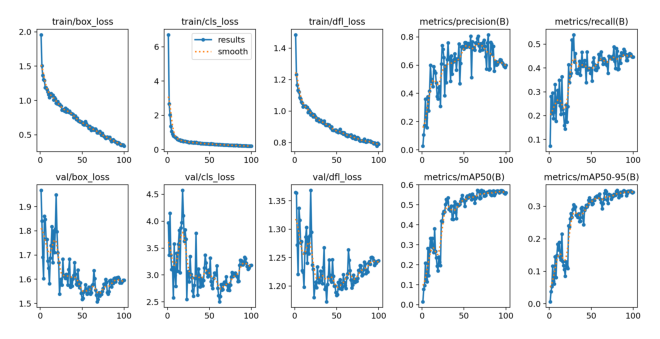

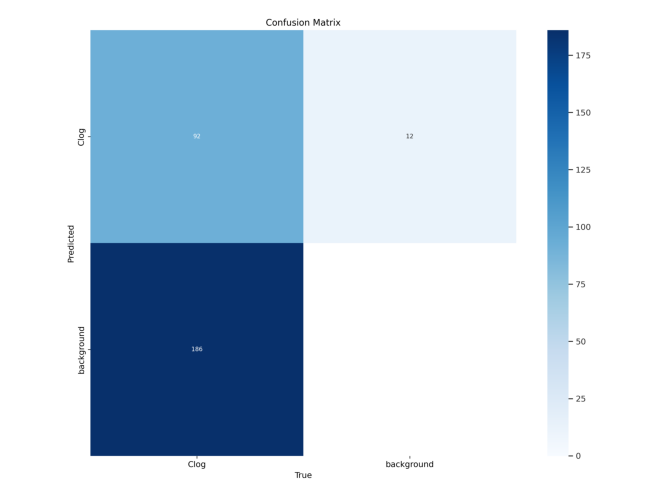

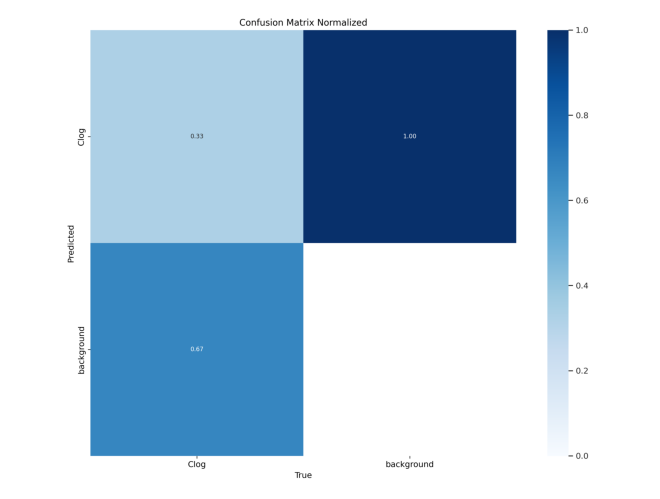

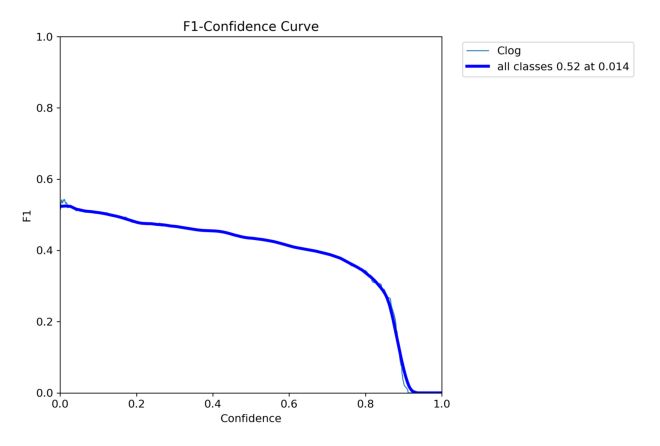

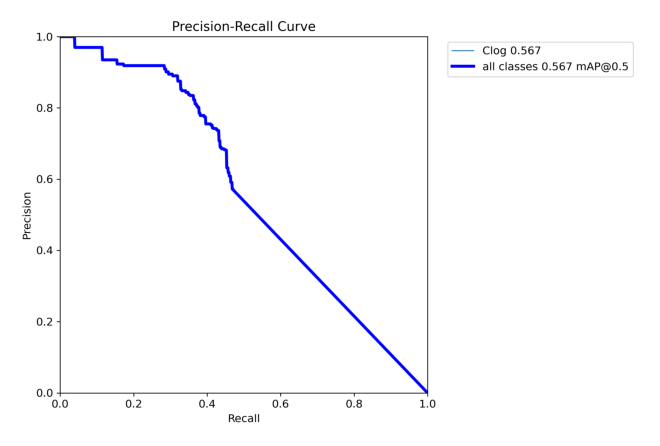

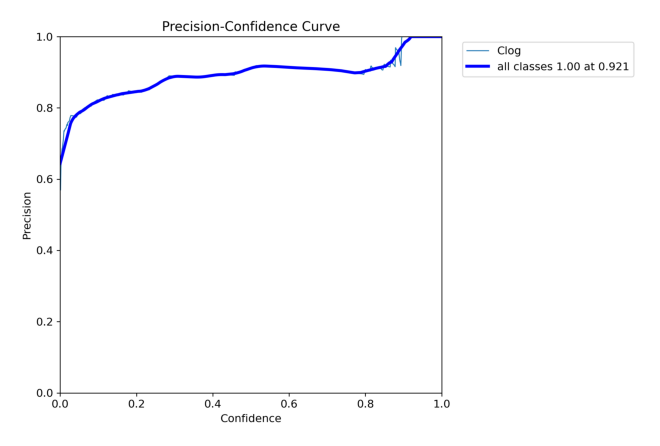

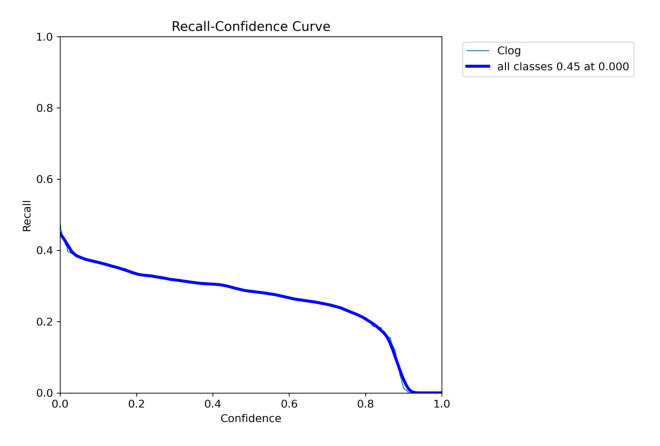

In [ ]:
# Explicitly call ClearML init before YOLOv8
task = Task.init(project_name="New_Algo",
                 task_name="exclude_test_A",
                 tags=['YOLOv8'],
                 )

# Put all our YOLOv8 arguments in a dictionary and pass it to ClearML
# When later we change any parameter in the UI, it will be overridden here!

args= {
    'data': '/content/datasets/data.yaml',
    'epochs': 100,
    'imgsz': 640,
    'save_period':100,
    'project':"allA",
    'seed': 123,
    'dropout': 0.01,
    'val': True,
    'hsv_h': 0,
    'hsv_s': 0,
    'hsv_v': 0,
    'degrees': 20,
    'translate': 0,
    'scale': 0,
    'fliplr': 0,
    'mosaic': 0,
}
task.connect(args)

# Load the YOLOv8 model
#model = YOLO('yolov8x.yaml')
#model = YOLO('yolov8x.yaml').load('yolov8x.pt')  # build from YAML and transfer weights
model = YOLO('/content/drive/MyDrive/Thesis_partB/Results/NewAlgo_TrainA_TestB/clog/train/weights/best.pt')
#model.load('/content/PILOT15.08.23/train/weights/epoch50.pt')
# Train the model using our arguments from before
# If running remotely they may have been changed by ClearML
results = model.train(**args)


In [ ]:
print(len(os.listdir("/content/datasets/test_exclude/images")))
print(len(os.listdir("/content/datasets/test_exclude/labels")))

96
96


In [ ]:
# Explicitly call ClearML init before YOLOv8

#task = Task.create(project_name="RandomSplit - A",
#                 task_name="Test"
#                                  )
args= {'data':"/content/datasets/data.yaml", 'split':"test"}

#task.connect(args)

model = YOLO('/content/drive/MyDrive/Thesis_partB/Results/NewAlgo_TrainA_TestB/train/weights/best.pt')
print("_________________test_____________")

results = model.val(**args)

#metrics = model.val(data = "/content/datasets/data.yaml",split = "test")  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


_________________test_____________


YOLOv8x summary (fused): 268 layers, 68125494 parameters, 0 gradients
val: Scanning /content/datasets/test_exclude/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:01<00:06,  1.22s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:04<00:08,  2.18s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 3/6 [00:08<00:09,  3.31s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]
                   all         96       1292      0.708      0.506       0.55      0.293
                  Clog         96   

In [ ]:
shutil.copytree("/content/drive/MyDrive/Thesis_partB/Results/NewAlgo_TrainA_TestB","/content/drive/MyDrive/Thesis_partB/TransferLearning/A_clog")
shutil.copytree("/content/runs/detect/val","/content/drive/MyDrive/Thesis_partB/TransferLearning/A_clog/val")

'/content/drive/MyDrive/Thesis_partB/TransferLearning/A_clog/val'

In [ ]:
shutil.copytree("/content/runs","/content/drive/MyDrive/Thesis_partB/TrainA_TestA/runs")

'/content/drive/MyDrive/Thesis_partB/TrainA_TestA/runs'

In [ ]:
shutil.copytree("/content/TrainA_TestA","/content/drive/MyDrive/Thesis_partB/TrainA_TestA")

'/content/drive/MyDrive/Thesis_partB/TrainA_TestA'

In [ ]:
%pip install optuna
python utils/loggers/clearml/hpo.py

SyntaxError: ignored

In [ ]:
print("_________________test_____________")
metrics = model.val(data = "/content/datasets/data.yaml",split = "test")  # no arguments needed, dataset and settings remembered
print("_________________val_____________")
metrics = model.val(data = "/content/dataset/data.yaml",split = "val")  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


_________________test_____________


val: Scanning /content/datasets/test/labels.cache... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:22<00:00,  1.14it/s]
                   all        395       2070     0.0572      0.057     0.0222     0.0116
                  Clog        395       2070     0.0572      0.057     0.0222     0.0116
Speed: 0.6ms preprocess, 44.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to PILOT15.08.23/val4
Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


_________________val_____________


FileNotFoundError: ignored

In [ ]:


results_path = "/content/drive/MyDrive/Thesis_partB/Results/TestAB/"
training_results_path = "/content/A/"
# Load a model
shutil.copytree(training_results_path,results_path,dirs_exist_ok = True)
# Validate the model
print("_________________test_____________")
metrics = model.val(data = "/content/dataset/data.yaml",split = "test")  # no arguments needed, dataset and settings remembered
print("_________________val_____________")
metrics = model.val(data = "/content/dataset/data.yaml",split = "val")  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


_________________test_____________


val: Scanning /content/dataset/test/labels.cache... 229 images, 101 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:21<00:00,  1.40s/it]
                   all        229       3079      0.371      0.141      0.188     0.0985
                  Clog        229       2568      0.219     0.0498      0.084      0.046
                  Leak        229        511      0.524      0.233      0.292      0.151
Speed: 1.3ms preprocess, 47.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to A/val3
Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


_________________val_____________


val: Scanning /content/dataset/val/labels.cache... 225 images, 107 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.05it/s]
                   all        225       2079      0.499      0.226      0.281      0.166
                  Clog        225       1750      0.649      0.367      0.465      0.268
                  Leak        225        329      0.348     0.0843     0.0971     0.0638
Speed: 0.8ms preprocess, 47.1ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to A/val4
